# IBM HR Analytics Employee Attrition Modeling .

### DESCRIPTION

 * IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and  hardware.

 * Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

#### Data Dictionary

 -  Age: Age of employee
 -  Attrition: Employee attrition status
 -  Department: Department of work
 -  DistanceFromHome
 -  Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
 -  EducationField
 -  EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
 -  JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
 -  MaritalStatus
 -  MonthlyIncome
 -  NumCompaniesWorked: Number of companies worked prior to IBM
 -  WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;
 -  YearsAtCompany: Current years of service in IBM
  
#### Analysis Task:

- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
- Exploratory data analysis

 1. Find the age distribution of employees in IBM
 2. Explore attrition by age
 3. Explore data for Left employees
 4. Find out the distribution of employees by the education field
 5. Give a bar chart for the number of married and unmarried employees
 
 
- Build up a logistic regression model to predict which employees are likely to attrite.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
dataset = pd.read_csv('../datasets/IBM Attrition Data.csv')

In [11]:
dataset.shape

(1470, 13)

In [43]:
dataset.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


#### Find the age distribution of employees in IBM

In [12]:
age_grouped = dataset.groupby('Age')

In [30]:
index = age_grouped.size().index

In [37]:
data = age_grouped.size().values

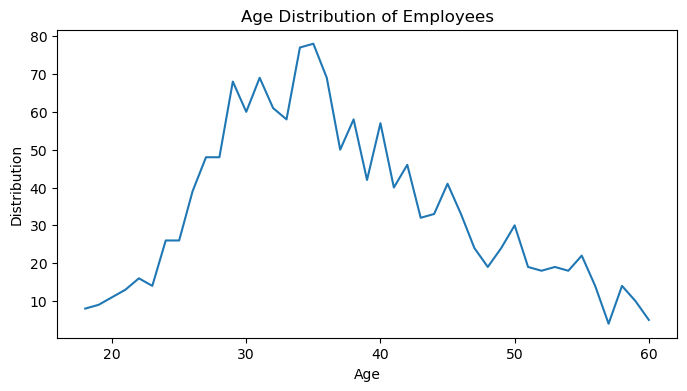

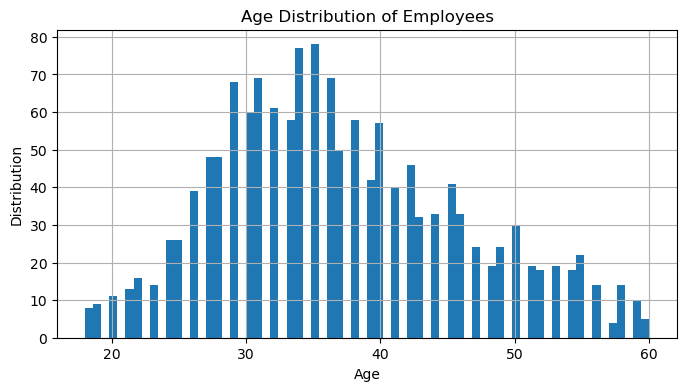

In [86]:
plt.figure(figsize=(8,4))
plt.plot(age_grouped.size())
plt.title("Age Distribution of Employees")
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.figure(figsize=(8,4))
dataset['Age'].hist(bins=70)
plt.title("Age Distribution of Employees")
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show()

#### explore attrition by age

In [55]:
attrition_grouped = dataset.groupby(['Age','Attrition'])

In [56]:
attrition_grouped.size()

Age  Attrition
18   No            4
     Yes           4
19   No            3
     Yes           6
20   No            5
                  ..
57   No            4
58   No            9
     Yes           5
59   No           10
60   No            5
Length: 82, dtype: int64

/var/folders/tm/ffwlhhvs4hjbp97q0xdt53r80000gn/T/ipykernel_9047/4294918261.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='y')


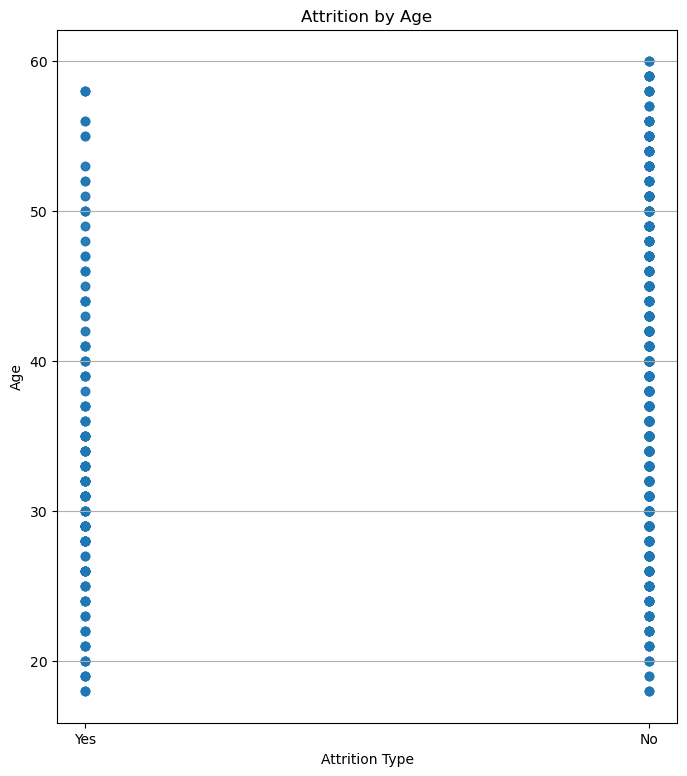

In [92]:
plt.figure(figsize=(8,9))
plt.scatter(dataset.Attrition,dataset.Age,alpha=.75)
plt.title("Attrition by Age")
plt.ylabel('Age')
plt.xlabel('Attrition Type')
plt.grid(b=True,which='major',axis='y')
plt.show()

In [57]:
attrition_grouped.first()

Department  DistanceFromHome  Education  \
Age Attrition                                                        
18  No                          Sales                10          3   
    Yes        Research & Development                 3          3   
19  No         Research & Development                 3          1   
    Yes                         Sales                22          1   
20  No         Research & Development                 1          3   
...                               ...               ...        ...   
57  No         Research & Development                24          2   
58  No                          Sales                10          4   
    Yes        Research & Development                23          4   
59  No         Research & Development                 3          3   
60  No         Research & Development                 7          3   

              EducationField  EnvironmentSatisfaction  JobSatisfaction  \
Age Attrition                                                            
18  No               Medical                        4                3   
    Yes        Life Sciences                        3                3   
19  No               Medical                        2                2   
    Yes            Marketing                        4                3   
20  No         Life Sciences                        4                2   
...                      ...                      ...              ...   
57  No         Life Sciences                        3                4   
58  No               Medical                        4                3   
    Yes              Medical                        4                4   
59  No               Medical                        3                1   
60  No         Life Sciences                        1                1   

              MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
Age Attrition                                                    
18  No               Single           1200                   1   
    Yes              Single           1420                   1   
19  No               Single           1483                   1   
    Yes              Single           1675                   1   
20  No               Single           2836                   1   
...                     ...            ...                 ...   
57  No             Divorced           9439                   3   
58  No               Single          13872                   0   
    Yes             Married          10312                   1   
59  No              Married           2670                   4   
60  No              Married          19566                   5   

               WorkLifeBalance  YearsAtCompany  
Age Attrition                                   
18  No                       3               0  
    Yes                      3               0  
19  No                       3               1  
    Yes                      2               0  
20  No                       4               1  
...                        ...             ...  
57  No                       1               5  
58  No                       2              37  
    Yes                      2              40  
59  No                       2               1  
60  No                       1              29  

[82 rows x 11 columns]

#### Explore data for Left employees

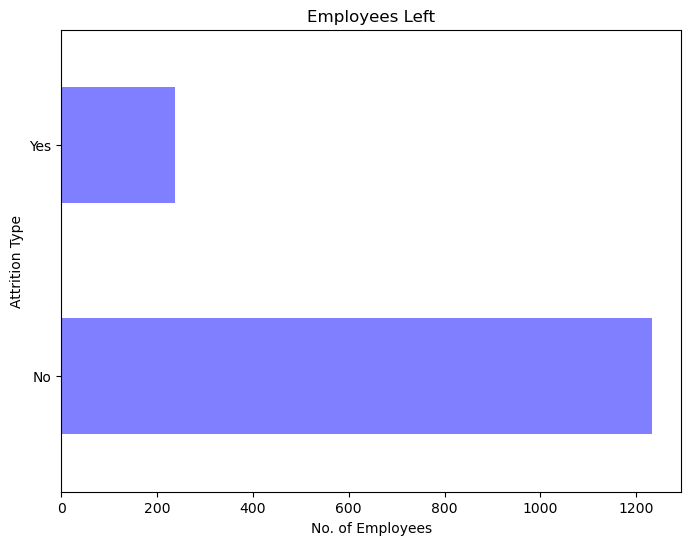

In [128]:
plt.figure(figsize=(8,6))
dataset.Attrition.value_counts().plot(kind='barh',color='b',alpha=.5)
plt.title('Employees Left')
plt.xlabel('No. of Employees')
plt.ylabel('Attrition Type')
plt.show()

#### Find out the distribution of employees by the education field

In [63]:
education_field = dataset.groupby('EducationField')

In [64]:
education_field.size()

EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
dtype: int64

Text(0, 0.5, 'Field Of Education')

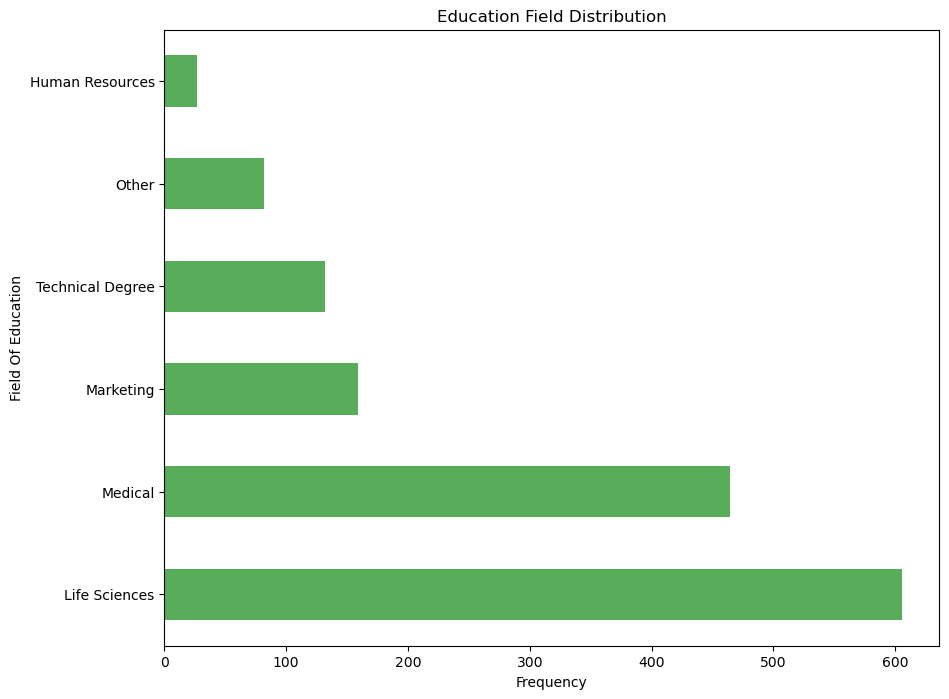

In [122]:
plt.figure(figsize=(10,8))
dataset.EducationField.value_counts().plot(kind='barh',color='g',alpha=0.65)
plt.title('Education Field Distribution')
plt.xlabel('Frequency')
plt.ylabel('Field Of Education')

#### Give a bar chart for the number of married and unmarried employees

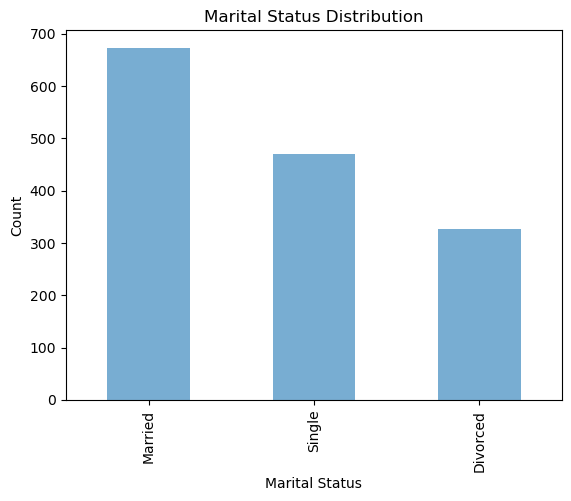

In [130]:
plt.title('Marital Status Distribution')
dataset.MaritalStatus.value_counts().plot(kind='bar',alpha=.6)
plt.ylabel('Count')
plt.xlabel('Marital Status')
plt.show()

### Model Building

#### Pre Processing data 

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [133]:
dataFrame = dataset

In [134]:
dataFrame.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [138]:
dataFrame['Attrition'].replace('Yes',1,inplace=True)
dataFrame['Attrition'].replace('No',0,inplace=True)

In [139]:
dataFrame.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [140]:
dataFrame.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [142]:
dataFrame['Department'].replace('Research & Development',1, inplace=True)
dataFrame['Department'].replace('Sales',2, inplace=True)
dataFrame['Department'].replace('Human Resources', 3, inplace=True)

In [143]:
dataFrame.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,1,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,1,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,1,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,1,2,1,Medical,1,2,Married,3468,9,3,2


In [144]:
dataFrame.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [145]:
dataFrame['EducationField'].replace('Life Sciences',1, inplace=True)
dataFrame['EducationField'].replace('Medical',2, inplace=True)
dataFrame['EducationField'].replace('Marketing', 3, inplace=True)
dataFrame['EducationField'].replace('Other',4, inplace=True)
dataFrame['EducationField'].replace('Technical Degree',5, inplace=True)
dataFrame['EducationField'].replace('Human Resources', 6, inplace=True)

In [146]:
dataFrame.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,Single,5993,8,1,6
1,49,0,1,8,1,1,3,2,Married,5130,1,3,10
2,37,1,1,2,2,4,4,3,Single,2090,6,3,0
3,33,0,1,3,4,1,4,3,Married,2909,1,3,8
4,27,0,1,2,1,2,1,2,Married,3468,9,3,2


In [147]:
dataFrame.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [148]:
dataFrame['MaritalStatus'].replace('Married',1, inplace=True)
dataFrame['MaritalStatus'].replace('Single',2, inplace=True)
dataFrame['MaritalStatus'].replace('Divorced',3, inplace=True)

In [149]:
dataFrame.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,2,1,2,1,3468,9,3,2


In [150]:
dataFrame.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [157]:
X = dataFrame.drop('Attrition',axis=1).values
y = dataFrame.Attrition.values

In [161]:
X = StandardScaler().fit_transform(X)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=0)

In [166]:
classifier = LogisticRegression().fit(X_train,y_train)

In [167]:
y_pred = classifier.predict(X_test)

In [168]:
accuracy_score(y_test,y_pred)

0.8435374149659864

In [169]:
confusion_matrix(y_test,y_pred)

array([[367,   4],
       [ 65,   5]])

In [171]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       371
           1       0.56      0.07      0.13        70

    accuracy                           0.84       441
   macro avg       0.70      0.53      0.52       441
weighted avg       0.80      0.84      0.79       441

